# Hito 1
**Nombres:** Gonzalo Sobarzo, Hernán Ulloa, Alexander Reisenegger, Ignacio Huenchumil.

**Fecha:** Septiembre 2022

**Grupo:** 11

**Curso:** CC5205

**Cuerpo docente:** Andres Abeliuk, Hernán Sarmiento,  Cinthia Sánchez, Jorge Ortiz

# Introducción
Como equipo buscamos una base de datos de música para así llevar a cabo un estudio de datos para poder predecir (y corroborar) distintos comportamientos de los consumidores de música, como por ejemplo, buscar potenciales hits sabiendo la trayectoria del artista o tal vez un posible remix al ver la popularidad de la canción original de modo que se estudiaran distintas influencia de los atributos de las canciones en su éxito.

Nuestra base de datos consta de distintos premios y certificaciones para canciones, albumes, artistas y a su vez cuanto tiempo se mantuvo popular, de modo que solo se muestran canciones que sean éxitos del momento tanto en spotify como en la lista de billboard, esto sera útil para poder predecir distintos atributos de una canción o artista y así enfocar nuestro proyecto al análisis de tendecias musicales.



# Exploración de datos
El dataset consiste de 8 tablas, una que contiene datos de las canciones que aparecen en la lista billboard 100 cada semana desde 1999 hasta 2019, incluyendo datos como el título, los artistas, los géneros de la cancion, artistas invitados y cuántas semanas ha pasado en el top hasta la fecha, y tabién una tabla que contiene datos de cada artista que ha aparecido en esa lista en dicho período de tiempo. También incluye 2 listas de los premios Grammy en el mismo intervalo de tiempo, una sobre canciones y una sobre los álbumes. Además una tabla de singles y una de álbumes según su certificación RIAA, también en el mismo período (certifica cuántas copias vendieron, por ejemplo certificación diamante, platino, multi platino, oro, diamante varias veces, entre otros). Por último hay 2 tablas de las canciones más populares de spotify desde 2016 hasta 2019, también semanales. Una tiene los datos generales del top 200 semanal como la cantidad de reproducciones y el nombre entre otros, y la otra tiene atributos para cada canción como por ejemplo energía, si está en modo mayor o menor, bailabilidad, etc.

Hay múltiples dudas que se puede plantear al respecto, por ejemplo la canción Radioactive de Imagine Dragons pasó casi 2 años en el Billboard 100, y sería interesante analizar por qué una canción mantiene su popularidad, mientras otras sólo se quedan en la fama por un corto período.


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [50]:
artistDf = pd.read_csv('data/artistDf.csv')
spotifyWeeklyTop = pd.read_csv('data/spotifyWeeklyTop200Streams.csv')
songAttributes = pd.read_csv('data/songAttributes_1999-2019.csv')
riaaSingleCerts = pd.read_csv('data/riaaSingleCerts_1999-2019.csv')
riaaAlbumCerts = pd.read_csv('data/riaaAlbumCerts_1999-2019.csv')
grammySongs = pd.read_csv('data/grammySongs_1999-2019.csv', sep = ';')
grammyAlbums = pd.read_csv('data/grammyAlbums_199-2019.csv')
billboardHot100 = pd.read_csv('data/billboardHot100_1999-2019.csv')

In [28]:
songAttributes.head()

,Unnamed: 0,Acousticness,Album,Artist,Danceability,Duration,Energy,Explicit,Instrumentalness,Liveness,Loudness,Mode,Name,Popularity,Speechiness,Tempo,TimeSignature,Valence
0,0,0.000728,Collective Soul (Deluxe Version),Collective Soul,0.520,234947,0.904,False,0.010300,0.0634,-5.030,1,Welcome All Again,35,0.0309,106.022,4,0.365
1,1,0.018200,Collective Soul (Deluxe Version),Collective Soul,0.581,239573,0.709,False,0.000664,0.1740,-4.909,1,Fuzzy,31,0.0282,120.027,4,0.408
2,2,0.000473,Collective Soul (Deluxe Version),Collective Soul,0.572,198400,0.918,False,0.000431,0.0977,-3.324,0,Dig,30,0.0559,144.061,4,0.370
3,3,0.000970,Collective Soul (Deluxe Version),Collective Soul,0.596,231453,0.661,False,0.000033,0.1130,-5.051,1,You,35,0.0254,111.975,4,0.183
4,4,0.000036,Collective Soul (Deluxe Version),Collective Soul,0.520,222520,0.808,False,0.000010,0.0800,-4.553,0,My Days,21,0.0318,92.721,4,0.666


In [29]:
artistDf.head()

,X,Artist,Followers,Genres,NumAlbums,YearFirstAlbum,Gender,Group.Solo
0,0,Ed Sheeran,52698756,"pop,uk pop",8,2011,M,Solo
1,1,Justin Bieber,30711450,"canadian pop,dance pop,pop,post-teen pop",10,2009,M,Solo
2,2,Jonas Brothers,3069527,"boy band,dance pop,pop,post-teen pop",10,2006,M,Group
3,3,Drake,41420478,"canadian hip hop,canadian pop,hip hop,pop rap,...",11,2010,M,Solo
4,4,Chris Brown,9676862,"dance pop,pop,pop rap,r&b,rap",6,2005,M,Solo


In [110]:
#Se mezclan las mediciones cuantitativas asociadas a sus respectivos artistas para cada cancion y album
attr1 = songAttributes.merge(artistDf.loc[:,['Artist', 'Genres']],
                            on = ['Artist'],
                            how = 'inner',
                            indicator=False)
attr1 = attr1.drop(labels =['Unnamed: 0', 'TimeSignature', 'Tempo','Duration'], axis=1)

idx = attr1.columns.get_loc("Name")
columns = attr1.columns.to_list()[idx:idx+1] + attr1.columns.to_list()[1: idx] + attr1.columns.to_list()[0:1] + attr1.columns.to_list()[idx+1:] #webeo para cambiar el orden de columnas
attr1 = attr1[columns] #cambiado :D

attr1.Explicit = attr1.Explicit.replace({True:1, False: 0})
#Es necesario aplicar subsampling debido a que existen problemas de uso de memoria. EL SUBSAMPLING DEBE SER ALEATORIO.


In [109]:
attr1.head(1)

,Name,Album,Artist,Danceability,Energy,Explicit,Instrumentalness,Liveness,Loudness,Mode,Acousticness,Popularity,Speechiness,Valence,Genres
0,Welcome All Again,Collective Soul (Deluxe Version),Collective Soul,0.52,0.904,0,0.0103,0.0634,-5.03,1,0.000728,35,0.0309,0.365,"alternative metal,alternative rock,pop rock,po..."


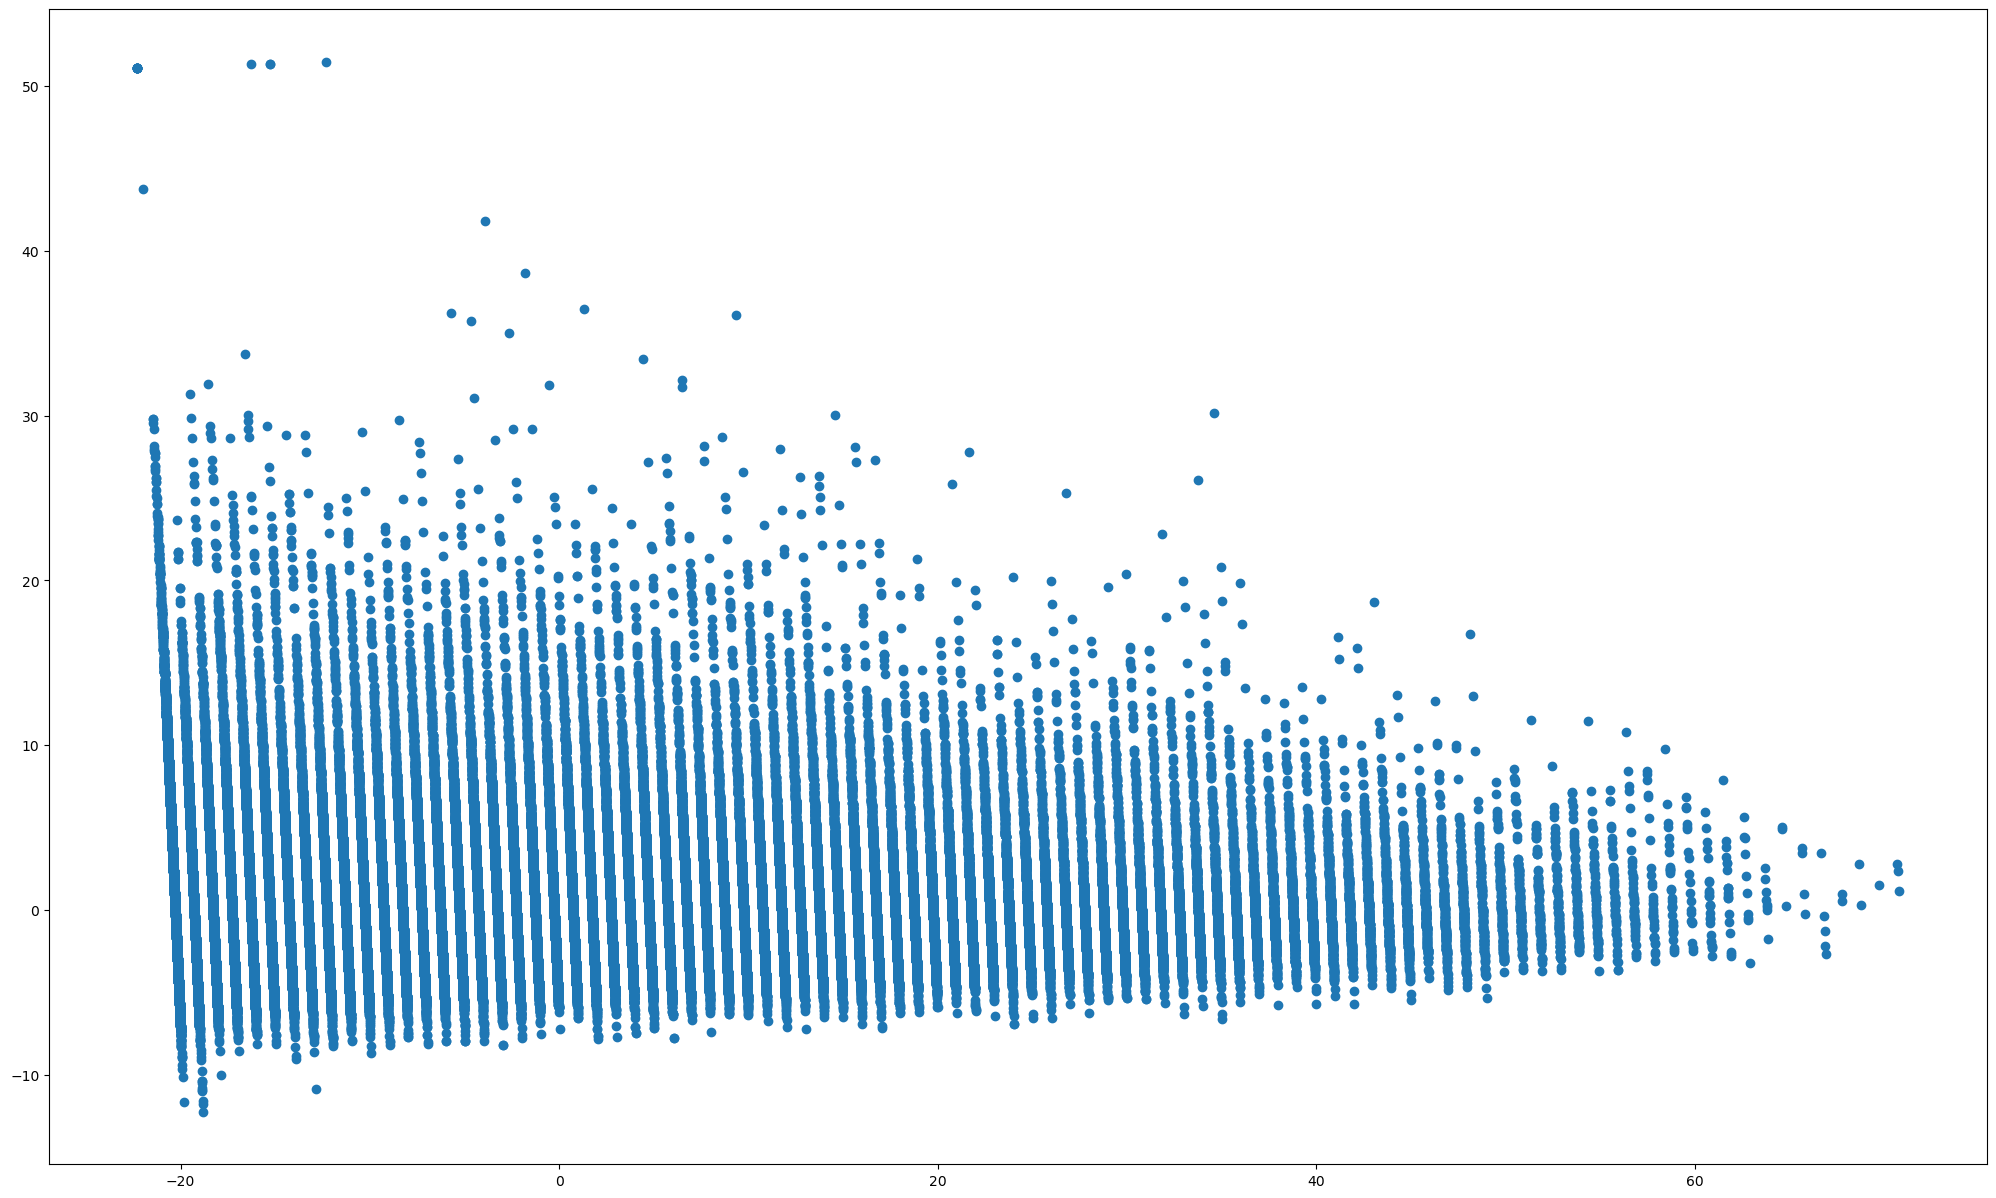

Index(['Danceability', 'Energy', 'Explicit', 'Instrumentalness', 'Liveness',
       'Loudness', 'Mode', 'Acousticness', 'Popularity', 'Speechiness',
       'Valence'],
      dtype='object')

In [126]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

rates = attr1.drop(columns = ['Name', 'Album', 'Artist', 'Genres']) #eliminar strings

pca = PCA(n_components=2).fit(rates)
rates_pca = pca.transform(rates)
rates_pca.shape

fig, ax = plt.subplots(sharex=True, figsize = (25,15))
plt.scatter(rates_pca[:,0], rates_pca[:,1])
plt.show()
rates.columns


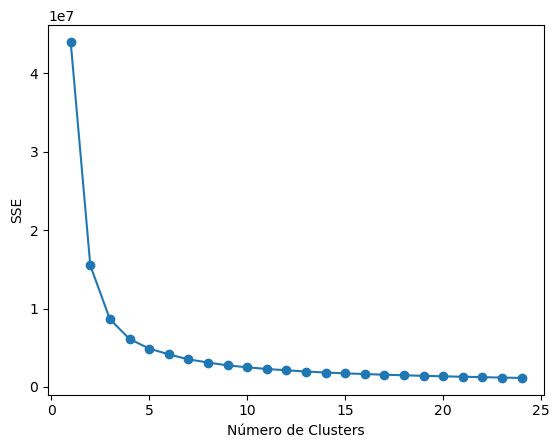

In [94]:
SSE = []
numClusters = list(range(1, 20))
for k in numClusters:
    k_means = KMeans(n_clusters=k, n_init=10, random_state=1)
    k_means.fit(rates)
    SSE.append(k_means.inertia_)

plt.plot(numClusters, SSE, marker="o")
plt.xlabel('Número de Clusters')
plt.ylabel('SSE')
plt.show()

In [112]:

kmeans =  KMeans(n_clusters=6, n_init = 20, max_iter = 50, random_state=0)
kmeans.fit(rates)

y_pred = kmeans.labels_
np.bincount(y_pred)

array([31820, 13114, 10069, 38354, 21467, 36396], dtype=int64)

Text(0.5, 1.0, "cluster's k = 5")

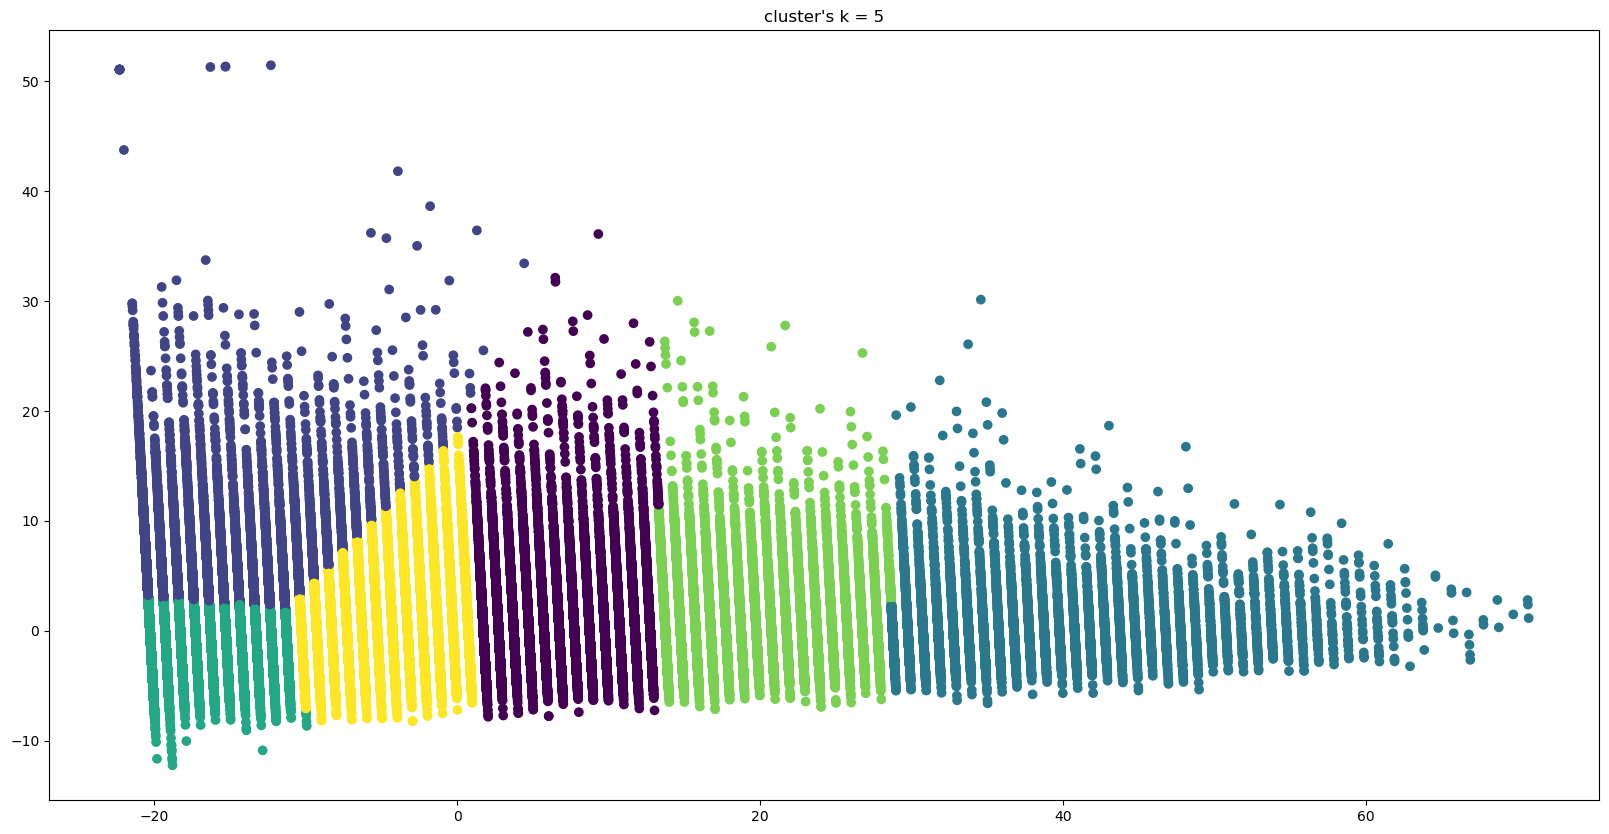

In [125]:
fig, ax = plt.subplots(sharex=True, figsize = (25,15))
plt.scatter(rates_pca[:, 0], rates_pca[:, 1], c= kmeans.labels_)
plt.title("cluster's k = 5")

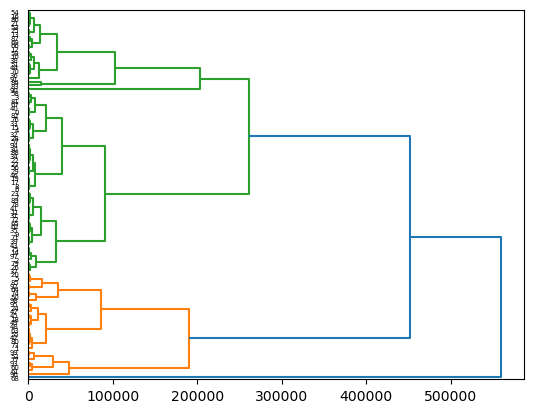

In [32]:
# revisar funciones de distancia/similitud:
# euclidiana, manhattan o cityblock, correlacion, coseno

from scipy.cluster.hierarchy import dendrogram, linkage

names = attr1['Name']
Y = attr1['Genres']
X = attr1.drop(labels=['Genres','Name', 'Album', 'Artist'], axis=1)[:100]

Z = linkage(X, 'ward', metric='euclidean')
dn = dendrogram(Z, labels= None, orientation='right')

In [33]:
#limpiar datos GrammySongs
grammySongs['Artist'] = grammySongs['Artist'].str.replace("&", ",")
grammySongs['Artist'] = grammySongs['Artist'].str.lower()
grammySongs['Name'] = grammySongs['Name'].str.lower()
grammySongs['Genre'] = grammySongs['Genre'].str.replace('&;', '&')

gs = grammySongs.drop(columns = 'Column1').drop(columns = 'X')

In [34]:
gr_1 = gs.groupby('Genre').agg({'Name':'count'})
gr_1

,Name
Genre,
American Roots Music,11
Composing/Arranging,8
Country,60
Dance/Electronic Music,17
General,40
Gospel/Contemporary Christian Music,10
Jazz,10
Pop,67
R&B,76


In [35]:
#limpiar datos BillboardHot1000
billboard_1 = billboardHot100.groupby(['Name', 'Artists', 'Week', 'Genre'], as_index=False).agg({'Weeks.on.chart' : 'max'})

billboard_1[['Week.day','Week.month','Week.year']] = billboard_1['Week'].apply( lambda x: pd.Series( np.flip(np.array(x.split('-')).astype('int')))) #se separa la fecha en tres columnas
billboard_1 = billboard_1.drop(columns = 'Week')

billboard_1['Genre'] = billboard_1['Genre'].str.replace('&;', '&') #remplaza caracter mal ubicado
billboard_1['Artists'] = billboard_1['Artists'].str.lower()
billboard_1['Name'] = billboard_1['Name'].str.lower()
billboard_1.head()

,Name,Artists,Genre,Weeks.on.chart,Week.day,Week.month,Week.year
0,'03 bonnie & clyde,jay,"West Coast,R&B,Rap",NaN,22,10,2002
1,'03 bonnie & clyde,jay,"West Coast,R&B,Rap",2.0,29,10,2002
2,'03 bonnie & clyde,jay,"West Coast,R&B,Rap",3.0,5,11,2002
3,'03 bonnie & clyde,jay,"West Coast,R&B,Rap",4.0,12,11,2002
4,'03 bonnie & clyde,jay,"West Coast,R&B,Rap",5.0,19,11,2002


In [36]:
df = pd.DataFrame(index = np.arange(1999,2020), columns = np.arange(1,13))

for i in df.index: #fila
    for j in df.columns: #columna
        data_aux = billboard_1[(billboard_1['Week.year'] == i) & (billboard_1['Week.month'] == j)]
        dicc = {}
        for gen in data_aux.Genre:
            for k in gen.split(','):
                dicc[k] = dicc.get(k,0) + 1
        df[j][i] = sorted(dicc.items(), key=lambda x: x[1], reverse= True)

In [37]:
songs = billboardHot100

En la siguiente tabla se ve que Imagine Dragons Paso 87 semanas en el Chart:

In [38]:
songs.sort_values(by = ['Weeks.on.chart'], ascending = False).head()

,Unnamed: 0,Artists,Name,Weekly.rank,Peak.position,Weeks.on.chart,Week,Date,Genre,Writing.Credits,Lyrics,Features
25705,25706,Imagine Dragons,Radioactive,49,3.0,87.0,2014-05-09,"February 14, 2012","Adult Alternative,Dubstep,Alternative Pop,Alte...","Imagine dragons, Daniel platzman, Wayne sermon...",Radioactive \nWhoah-oh\nWhoah-oh\nWhoah-oh\nWh...,NaN
25795,25796,Imagine Dragons,Radioactive,48,3.0,86.0,2014-05-02,"February 14, 2012","Adult Alternative,Dubstep,Alternative Pop,Alte...","Imagine dragons, Daniel platzman, Wayne sermon...",Radioactive \nWhoah-oh\nWhoah-oh\nWhoah-oh\nWh...,NaN
25879,25880,Imagine Dragons,Radioactive,42,3.0,85.0,2014-04-25,"February 14, 2012","Adult Alternative,Dubstep,Alternative Pop,Alte...","Imagine dragons, Daniel platzman, Wayne sermon...",Radioactive \nWhoah-oh\nWhoah-oh\nWhoah-oh\nWh...,NaN
25965,25966,Imagine Dragons,Radioactive,39,3.0,84.0,2014-04-18,"February 14, 2012","Adult Alternative,Dubstep,Alternative Pop,Alte...","Imagine dragons, Daniel platzman, Wayne sermon...",Radioactive \nWhoah-oh\nWhoah-oh\nWhoah-oh\nWh...,NaN
26053,26054,Imagine Dragons,Radioactive,37,3.0,83.0,2014-04-11,"February 14, 2012","Adult Alternative,Dubstep,Alternative Pop,Alte...","Imagine dragons, Daniel platzman, Wayne sermon...",Radioactive \nWhoah-oh\nWhoah-oh\nWhoah-oh\nWh...,NaN


In [39]:
dicc = {}
i  = 0
for row, col in songs.iterrows():
    aux = col['Genre'].split(',')
    for k in aux:
        if k in aux:
            dicc[k] = dicc.get(k,0) + 1
        i+=1


In [40]:
gen = pd.DataFrame([[key, dicc[key]] for key in dicc.keys()], columns=['Genre', 'Frecuency'])

In [41]:
gen2 = gen.sort_values(by = ['Frecuency'], ascending=False).head(10)
gen2.reset_index()

,index,Genre,Frecuency
0,9,Pop,41013
1,8,Rap,30581
2,46,Rock,23921
3,30,R&;B,20414
4,0,Country,19696
5,24,Pop-Rock,8640
6,41,Alternative Rock,6952
7,4,Trap,5586
8,17,Electro-Pop,4801
9,39,Adult Alternative,4719


En este gráfico de tablas se pueden ver los géneros mas recurrentes en el billboard top 100:

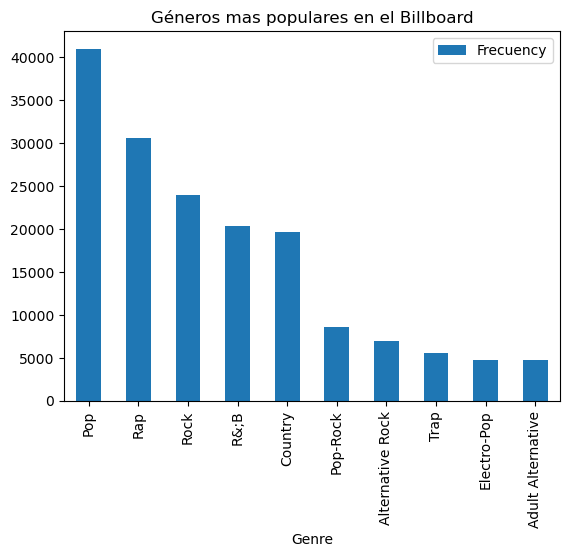

In [42]:
ax = gen2.plot.bar(x='Genre', y = 'Frecuency', stacked=True, title = "Géneros mas populares en el Billboard")

In [43]:
gr_1

,Name
Genre,
American Roots Music,11
Composing/Arranging,8
Country,60
Dance/Electronic Music,17
General,40
Gospel/Contemporary Christian Music,10
Jazz,10
Pop,67
R&B,76


En esta tabla se muestran los artistas con mayor número de seguidores en spotify:

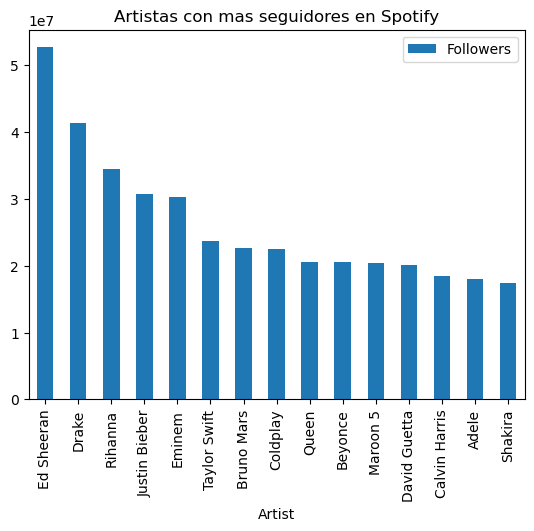

In [44]:
artist_p = artistDf.sort_values(by = ['Followers'], ascending=False)
artist_p = artist_p.head(17)
artist_p = artist_p.drop([769, 828]) #elimina play y cold, ya que eran versiones repetidas de coldplay
ax = artist_p.plot.bar(x= 'Artist', y = 'Followers', stacked= True, title = "Artistas con mas seguidores en Spotify")

El siguiente diagrama de cajas representa la distribución de los atributos,  filtrados por las canciones que aparecen en la tabla de billboard 100:

<AxesSubplot:title={'center':'Distribucion de los atributos de las canciones más populares'}>

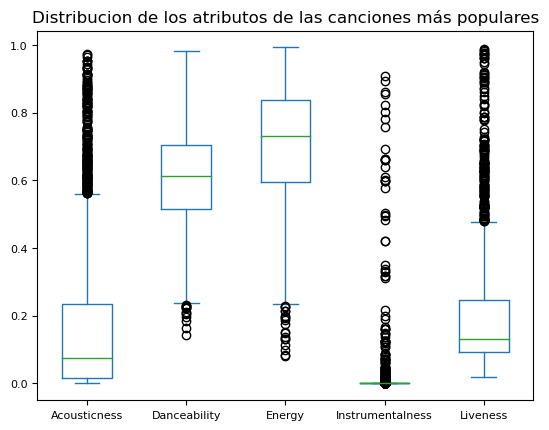

In [45]:

songAttributes = songAttributes.rename(columns = {"Artist" : "Artists"})
songAttributes.head()
sa = (
    songAttributes.merge(billboardHot100, 
              on=['Name', 'Artists'],
              how='left', 
              indicator=True)
    .query('_merge == "both"')
    .drop(columns='_merge')
)
sa = sa.drop_duplicates(subset = ["Name", "Artists"])

sa.iloc[:,[1, 4, 6, 8, 9]].plot.box(stacked=True, fontsize = 8, title = "Distribucion de los atributos de las canciones más populares")



La siguiente matriz de correlación muestra como se comparan las variables de los artistas en spotify:

<AxesSubplot:>

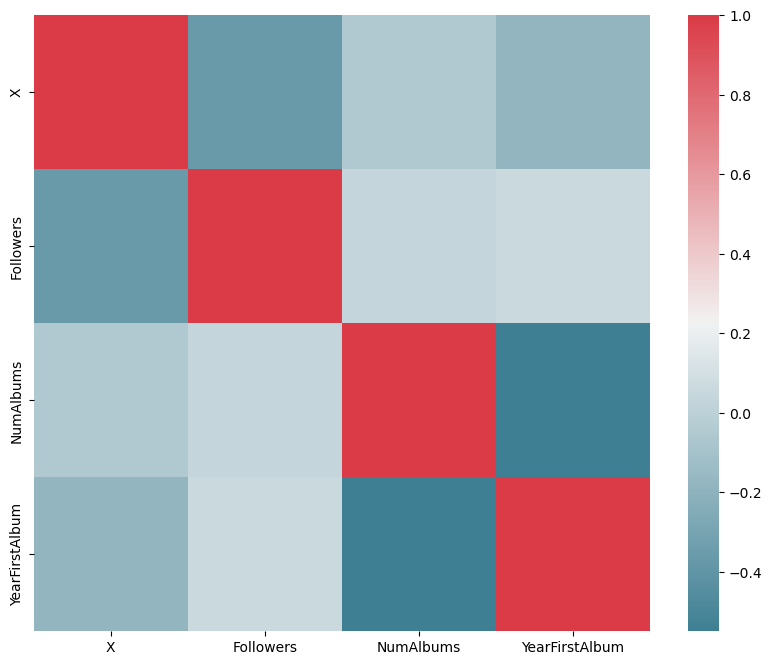

In [46]:
import seaborn as sns
import matplotlib.pyplot as pl
import numpy as np
f, ax = pl.subplots(figsize=(10, 8))
corr = artistDf.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

En el siguiente gráfico se observa que el artista que tiene más grammy's por canciones es Adele y la banda con más premios es U2:

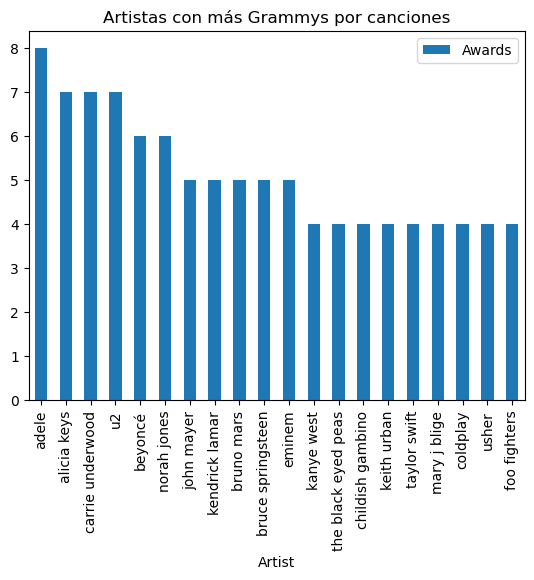

In [47]:
winners = grammySongs.loc[:, ['Artist']]
gen3 = winners.groupby(winners.columns.tolist(),as_index=False).size().rename(columns={'size':'Awards'})
gen4 = gen3.sort_values(by = ['Awards'], ascending=False).head(20)
grs = gen4.plot.bar(x= 'Artist', y = 'Awards', stacked= True, title = 'Artistas con más Grammys por canciones')


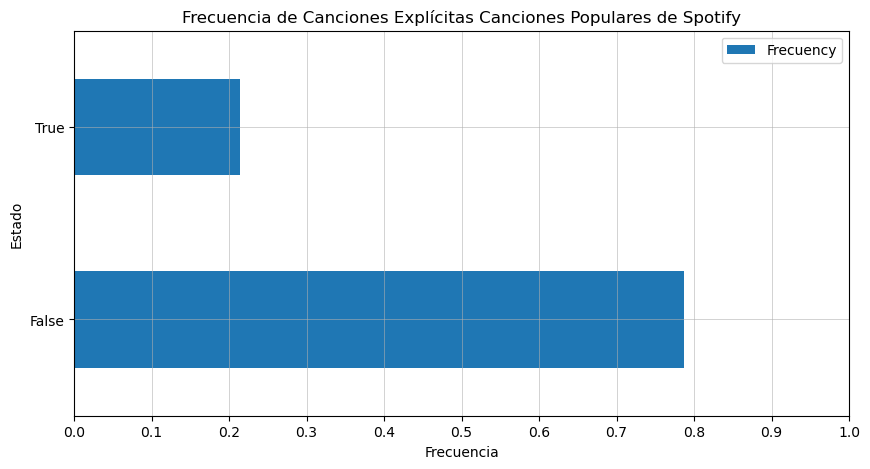

In [48]:
explicit = songAttributes.Explicit.value_counts(normalize=True)
df2 = pd.DataFrame([
                    ["False",explicit[0]],
                    ["True",explicit[1]]
                    ],
                    columns=["State","Frecuency"])


ax  = df2.plot.barh(x = "State", y = "Frecuency", xticks = [k/10 for k in list(range(11))], figsize = (10,5))
ax.set(xlabel = "Frecuencia", ylabel = "Estado", title = "Frecuencia de Canciones Explícitas Canciones Populares de Spotify")
ax.grid(linestyle='-', linewidth=0.4)
plt.show()

# Preguntas y problemas

Preguntas y problemas
 Despues de haber analizando y planteado las tablas con sus respectivos datos sabemos que todas las tablas poseen una medida de popularidad, alcance o ventas, que miden la influencia de la canción artista y/o album, al mismo tiempo se puede ver que estos rankings son distintos ya que spotify tiene una base de datos distinta a las demas tablas (RIAA, Billboars, Grammys) Por lo cual podemos manejarnos entre las tablas midiendo la popularidad con las siguientes preguntas:
- ¿Que hace que ciertos géneros musicales se mantengan mas tiempo con popularidad?

Hay Géneros que se mantienen atemporales y siempre figuran en los charts en el transcurso de los 20 años que se registran como es el caso del POP que es el que aparece más veces en la base de datos.
- ¿Cómo afectan los grammys a la popularidad del artista?

El objetivo es estudiar si al exposición que logra una canción premiada en los grammy's logra llegar a los charts o hacer que la canción se mantenga más tiempo en estos, así acumulando más semanas en los charts.
- ¿Hay ciertos géneros que se beneficien de ser “explicit”?

Como por ejemplo el Hip-Hop, Trap, etc. Por su aumento en popularidad en estos últimos años
y siendo galardonados en categorías mas generales como canción del año del 2019 siendo la triunfadora This is America de Childish Gambino. 